## Import libraries and data

In [1]:
# import library
import numpy as np 
import pandas as pd 
import datetime as dt
from copy import deepcopy 

#For Data  Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import ydata_profiling
%matplotlib inline 


#For Machine Learning Algorithm
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

## Ignore warning
import warnings
warnings.filterwarnings("ignore")

C:\Users\lehai\AppData\Local\Temp\ipykernel_15972\2106919398.py:10: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [2]:
## import data
df = pd.read_csv('final_data_merge.csv')
df

,order_id,customer_unique_id,order_purchase_timestamp,product_id,order_item_id,product_category,price,freight_value,total_amount,review_score,customer_city,customer_state
0,00e7ee1b050b8499577073aeb2a297a1,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:05:35,a9516a079e37a9c9c36b9b78b10169e8,1,office_furniture,124.99,21.88,146.87,4,franca,SP
1,c1d2b34febe9cd269e378117d6681172,9eae34bbd3a474ec5d07949ca7de67c0,2017-11-09 00:50:13,a9516a079e37a9c9c36b9b78b10169e8,1,office_furniture,112.99,24.90,137.89,1,santarem,PA
2,c1d2b34febe9cd269e378117d6681172,9eae34bbd3a474ec5d07949ca7de67c0,2017-11-09 00:50:13,a9516a079e37a9c9c36b9b78b10169e8,2,office_furniture,112.99,24.90,137.89,1,santarem,PA
3,b1a5d5365d330d10485e0203d54ab9e8,3c799d181c34d51f6d44bbbc563024db,2017-05-07 20:11:26,a9516a079e37a9c9c36b9b78b10169e8,1,office_furniture,124.99,15.62,140.61,3,nova santa rita,RS
4,574fe1739f65af76badd0999db300b4f,567ab47ca4deb92d46dbf54dce07d0a7,2017-03-23 15:10:17,a9516a079e37a9c9c36b9b78b10169e8,1,office_furniture,126.99,15.06,142.05,4,angelina,SC
...,...,...,...,...,...,...,...,...,...,...,...,...
44938,d3782eb2976abf986175941c51364aab,94431ab24129f0060b53a89cfd62462f,2017-12-06 21:38:12,197f7d1d3a8b0bf0c8f0394ff71b574b,2,construction_tools_lights,88.00,10.55,98.55,5,dracena,SP
44939,14983a8e9fbbb6ec172cbfcdc13aa291,d870a06834e68bdc8864f3a9a97e73ec,2017-12-29 13:11:06,197f7d1d3a8b0bf0c8f0394ff71b574b,2,construction_tools_lights,88.00,19.91,107.91,3,nilopolis,RJ
44940,4fc1ab1684475d151043e9bcb3e3a0eb,5b16e124fa622d31637c864d2e343e4a,2017-06-30 10:13:23,17ec1cf6dc8dc7557ca34f1d64a93dc7,1,small_appliances_home_oven_and_coffee,71.90,16.75,88.65,5,belo horizonte,MG
44941,b0f3b60e4ef21a14515d0e51782a7580,ff3ae96c88f8dfaeffdbd0af958d8dff,2017-08-13 22:11:21,31240eaae01b43247d878f3e89996e35,1,small_appliances_home_oven_and_coffee,21.90,11.85,33.75,3,suzano,SP


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44943 entries, 0 to 44942
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   order_id                  44943 non-null  object 
 1   customer_unique_id        44943 non-null  object 
 2   order_purchase_timestamp  44943 non-null  object 
 3   product_id                44943 non-null  object 
 4   order_item_id             44943 non-null  int64  
 5   product_category          44943 non-null  object 
 6   price                     44943 non-null  float64
 7   freight_value             44943 non-null  float64
 8   total_amount              44943 non-null  float64
 9   review_score              44943 non-null  int64  
 10  customer_city             44943 non-null  object 
 11  customer_state            44943 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 4.1+ MB


In [3]:
# Change datatype of the column order_purchase_timestamp (object) to datetime

df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'], format='%Y-%m-%d %H:%M:%S')

# 1. Unsupervised learning : Clustering Customers avec l'algorithme du K-Means via RFM Model

## Recency, Fredquency and Monetary Value Model

In [4]:
#Data preparation steps
max_date = df.order_purchase_timestamp.max()
min_date = df.order_purchase_timestamp.min()
print('Lastest order time:', min_date, '\nNewest order time:',
       max_date, '\n')

Lastest order time: 2017-01-05 11:56:06 
Newest order time: 2017-12-31 23:29:31 



In [5]:
#Function Lambdea: it gives the number of days between hypothetical today and the last transaction
rfm_data = df.groupby(['customer_unique_id']).agg({'order_purchase_timestamp': lambda x: (max_date - x.max()).days , 
                                           'order_id': lambda x: x.nunique(),
                                           'total_amount': lambda x: x.sum()})

# Rename columns
rfm_data.rename(columns = {'order_purchase_timestamp' : 'Recency', 
                      'order_id' : 'Frequency', 
                      'total_amount' : 'Monetary'}, inplace = True)

# Sample RFM data 
rfm_data


,Recency,Frequency,Monetary
customer_unique_id,,,
0000f46a3911fa3c0805444483337064,296,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,80,1,43.62
0004aac84e0df4da2b147fca70cf8255,47,1,196.89
0005e1862207bf6ccc02e4228effd9a0,301,1,150.12
0006fdc98a402fceb4eb0ee528f6a8d4,166,1,29.00
...,...,...,...
fffa431dd3fcdefea4b1777d114144f2,62,1,81.20
fffb09418989a0dbff854a28163e47c6,14,1,73.16
fffea47cd6d3cc0a88bd621562a9d061,21,1,84.58


In [7]:
rfm_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38079 entries, 0000f46a3911fa3c0805444483337064 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    38079 non-null  int64  
 1   Frequency  38079 non-null  int64  
 2   Monetary   38079 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.2+ MB


### Overview RFM Model

In [8]:
report= ProfileReport(rfm_data)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

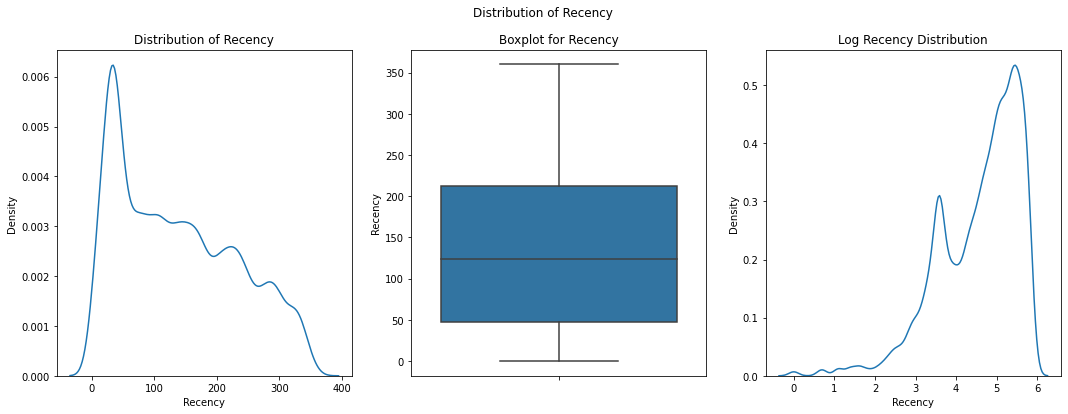

In [6]:

fig, axes = plt.subplots(1, 3, figsize = (18, 6))

sns.kdeplot(rfm_data['Recency'], ax = axes[0]).set_title("Distribution of Recency")
sns.boxplot(y = rfm_data['Recency'], ax = axes[1]).set_title("Boxplot for Recency")
sns.kdeplot(np.log(rfm_data['Recency']), ax = axes[2]).set_title("Log Recency Distribution")
fig.suptitle('Distribution of Recency')

plt.show()

In [7]:
print("Lower limit for Recency: " + str(np.exp(2)))
print("Upper limit for Recency: " + str(np.exp(6)))
print("\n================================================\n")
print('25th percentile value  of Recency: ' + str(np.quantile(rfm_data['Recency'], 0.25)))
print('75th percentile value of Recency: ' + str(np.quantile(rfm_data['Recency'], 0.75)))

Lower limit for Recency: 7.38905609893065
Upper limit for Recency: 403.4287934927351


25th percentile value  of Recency: 47.0
75th percentile value of Recency: 213.0


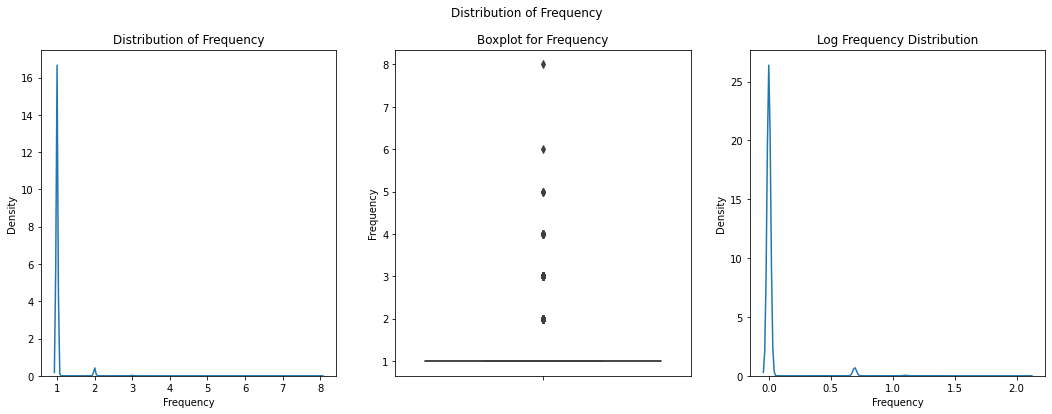

In [8]:
fig, axes = plt.subplots(1, 3, figsize = (18, 6))

sns.kdeplot(rfm_data['Frequency'], ax = axes[0]).set_title("Distribution of Frequency")
sns.boxplot(y = rfm_data['Frequency'], ax = axes[1]).set_title("Boxplot for Frequency")
sns.kdeplot(np.log(rfm_data['Frequency']), ax = axes[2]).set_title("Log Frequency Distribution")
fig.suptitle('Distribution of Frequency')

plt.show()

In [9]:
print("Lower limit for Frequency: " + str(np.exp(-0.5)))
print("Upper limit for Frequency: " + str(np.exp(0.5)))
print("\n================================================\n")
print('1th percentile value  of Frequency: ' + str(np.quantile(rfm_data['Frequency'], 0.01)))
print('75th percentile value of Frequency: ' + str(np.quantile(rfm_data['Frequency'], 0.75)))

Lower limit for Frequency: 0.6065306597126334
Upper limit for Frequency: 1.6487212707001282


1th percentile value  of Frequency: 1.0
75th percentile value of Frequency: 1.0


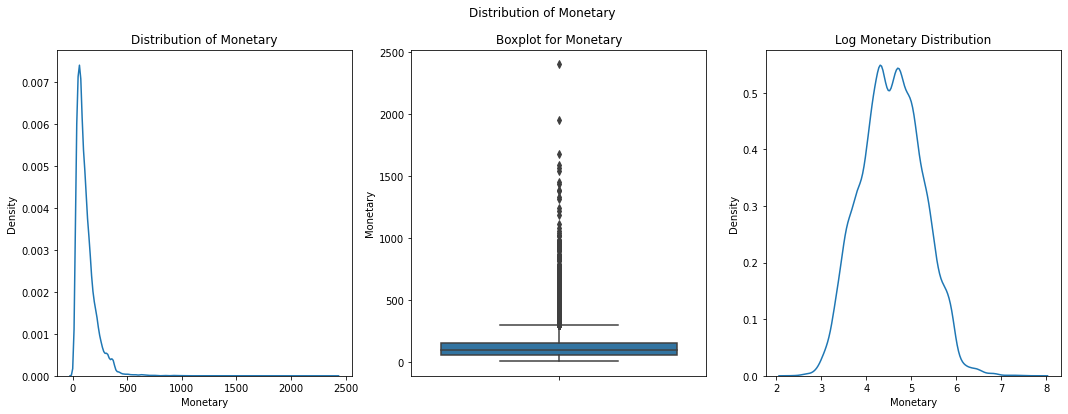

In [10]:
fig, axes = plt.subplots(1, 3, figsize = (18, 6))

sns.kdeplot(rfm_data['Monetary'], ax = axes[0]).set_title("Distribution of Monetary")
sns.boxplot(y = rfm_data['Monetary'], ax = axes[1]).set_title("Boxplot for Monetary")
sns.kdeplot(np.log(rfm_data['Monetary']), ax = axes[2]).set_title("Log Monetary Distribution")
fig.suptitle('Distribution of Monetary')

plt.show()

In [11]:
print("Lower limit for Frequency: " + str(np.exp(3)))
print("Upper limit for Frequency: " + str(np.exp(6)))
print("\n================================================\n")
print('1th percentile value  of Frequency: ' + str(np.quantile(rfm_data['Monetary'], 0.01)))
print('75th percentile value of Frequency: ' + str(np.quantile(rfm_data['Monetary'], 0.75)))

Lower limit for Frequency: 20.085536923187668
Upper limit for Frequency: 403.4287934927351


1th percentile value  of Frequency: 23.6
75th percentile value of Frequency: 155.63


### Remove Outliers

In [15]:
def remove_outliers(dataframe, variable, q1=0.25, q3=0.75):
    '''
    Detects outliers with IQR method and removes them
    '''
    df_ = dataframe.copy()
    quartile1 = df_[variable].quantile(q1)
    quartile3 = df_[variable].quantile(q3)
    iqr = quartile3 - quartile1
    
    up_limit = quartile3 + 1.5 * iqr
    low_limit = quartile1 - 1.5 * iqr
    
    df_ = df_[(df_[variable] >= low_limit) & (df_[variable] <= up_limit)]
    
    return df_

# Removing outliers
rfm_data = remove_outliers(rfm_data, "Recency", q1=0.25, q3=0.75)

rfm_data = remove_outliers(rfm_data, "Monetary", q1=0.01, q3=0.9)
rfm_data.shape

(37874, 3)

### Building RFM Score

In [16]:
print(rfm_data['Frequency'].max())
print(rfm_data['Frequency'].min())

8
1


In [17]:
def calc_note(x):
    if x <= 2:
        return 1
    if x <= 4:
        return 2
    if x <= 6:
        return 3
    if x <= 8:
        return 4

In [18]:
rfm_data["F"] = rfm_data["Frequency"].apply(lambda x: calc_note(x))


In [19]:
#Building RFM segments
r_labels =range(4,0,-1)
f_labels=range(1,5)
m_labels=range(1,5)
r_quartiles = pd.qcut(rfm_data['Recency'], q=4, labels = r_labels)
m_quartiles = pd.qcut(rfm_data['Monetary'],q=4,labels = m_labels)
rfm_data = rfm_data.assign(R=r_quartiles,M=m_quartiles)

rfm_data['RFM_Score'] = rfm_data[['R','F','M']].sum(axis=1)
rfm = rfm_data
rfm_data.head()

,Recency,Frequency,Monetary,F,R,M,RFM_Score
customer_unique_id,,,,,,,
0000f46a3911fa3c0805444483337064,296,1,86.22,1,1,2,4
0000f6ccb0745a6a4b88665a16c9f078,80,1,43.62,1,3,1,5
0004aac84e0df4da2b147fca70cf8255,47,1,196.89,1,4,4,9
0005e1862207bf6ccc02e4228effd9a0,301,1,150.12,1,1,3,5
0006fdc98a402fceb4eb0ee528f6a8d4,166,1,29.00,1,2,1,4


In [20]:
rfm_data.describe()

,Recency,Frequency,Monetary,F,RFM_Score
count,37874.000000,37874.000000,37874.000000,37874.000000,37874.000000
mean,137.544410,1.028014,118.681467,1.001584,6.004251
std,95.535341,0.180600,82.163160,0.042343,1.594159
min,0.000000,1.000000,10.070000,1.000000,3.000000
25%,47.000000,1.000000,59.240000,1.000000,5.000000
50%,124.000000,1.000000,96.020000,1.000000,6.000000
75%,213.000000,1.000000,154.707500,1.000000,7.000000
max,360.000000,8.000000,549.780000,4.000000,12.000000


## Clustering Customers

In [21]:
## Standardise the data using standardscaler

scaler = StandardScaler()
scaler.fit(rfm_data)
rfm_scaled = scaler.transform(rfm_data)
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns = rfm_data.columns)
display(rfm_data.head())
print("===============================")
display(rfm_scaled_df.head())


,Recency,Frequency,Monetary,F,R,M,RFM_Score
customer_unique_id,,,,,,,
0000f46a3911fa3c0805444483337064,296,1,86.22,1,1,2,4
0000f6ccb0745a6a4b88665a16c9f078,80,1,43.62,1,3,1,5
0004aac84e0df4da2b147fca70cf8255,47,1,196.89,1,4,4,9
0005e1862207bf6ccc02e4228effd9a0,301,1,150.12,1,1,3,5
0006fdc98a402fceb4eb0ee528f6a8d4,166,1,29.00,1,2,1,4


,Recency,Frequency,Monetary,F,R,M,RFM_Score
0,1.658629,-0.155118,-0.395091,-0.037414,-1.343553,-0.446774,-1.257263
1,-0.602344,-0.155118,-0.913578,-0.037414,0.444138,-1.341126,-0.629965
2,-0.947771,-0.155118,0.951881,-0.037414,1.337983,1.341929,1.879228
3,1.710966,-0.155118,0.382640,-0.037414,-1.343553,0.447577,-0.629965
4,0.297858,-0.155118,-1.091519,-0.037414,-0.449708,-1.341126,-1.257263


In [22]:
rfm_scaled_df.describe()

,Recency,Frequency,Monetary,F,R,M,RFM_Score
count,3.787400e+04,3.787400e+04,3.787400e+04,3.787400e+04,3.787400e+04,3.787400e+04,3.787400e+04
mean,-5.828129e-17,1.939724e-15,-1.321281e-16,-2.750644e-15,2.653701e-16,1.283716e-16,-5.144536e-17
std,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00
min,-1.439742e+00,-1.551181e-01,-1.321917e+00,-3.741364e-02,-1.343553e+00,-1.341126e+00,-1.884561e+00
25%,-9.477708e-01,-1.551181e-01,-7.234660e-01,-3.741364e-02,-4.497076e-01,-1.341126e+00,-6.299648e-01
50%,-1.417757e-01,-1.551181e-01,-2.758142e-01,-3.741364e-02,4.441379e-01,-4.467744e-01,-2.666605e-03
75%,7.898290e-01,-1.551181e-01,4.384752e-01,-3.741364e-02,1.337983e+00,1.118341e+00,6.246316e-01
max,2.328547e+00,3.860512e+01,5.246928e+00,7.081279e+01,1.337983e+00,1.341929e+00,3.761122e+00


In [23]:
# Save the scaler using pickle
with open("Model/scaler.pickle", "wb") as f:
    pickle.dump(scaler,f)

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

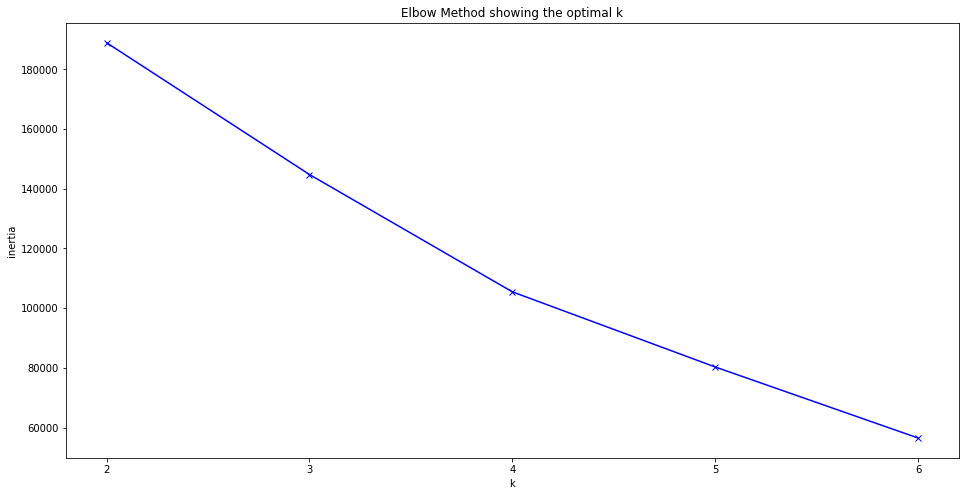

In [24]:
#Choosing the number of clusters k. Build the elbow graph to find the best k
K = range(2, 7)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(rfm_scaled_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

K = range(2, 7)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(rfm_scaled_df)
    
    filename = "Model/kmeans_" + str(k) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(rfm_scaled_df, kmeans.predict(rfm_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

### Clustering with K-Means with k = 4

In [25]:
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans.fit(rfm_scaled_df)
kmeans.labels_


array([1, 0, 3, ..., 0, 1, 1])

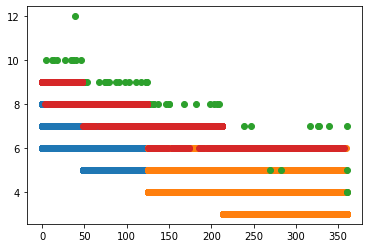

In [26]:
# assign a cluster to each example
labels = kmeans.predict(rfm_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    plt.scatter(rfm_data.to_numpy()[row_ix, 0], rfm_data.to_numpy()[row_ix,6])
    # show the plot
plt.show()

### Adding cluster columns to the pandas data frame

In [27]:
clusters = kmeans.predict(rfm_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0    13998
1    15305
2       57
3     8514
dtype: int64

In [28]:
rfm_data["cluster"] = clusters
rfm_data

,Recency,Frequency,Monetary,F,R,M,RFM_Score,cluster
customer_unique_id,,,,,,,,
0000f46a3911fa3c0805444483337064,296,1,86.22,1,1,2,4,1
0000f6ccb0745a6a4b88665a16c9f078,80,1,43.62,1,3,1,5,0
0004aac84e0df4da2b147fca70cf8255,47,1,196.89,1,4,4,9,3
0005e1862207bf6ccc02e4228effd9a0,301,1,150.12,1,1,3,5,1
0006fdc98a402fceb4eb0ee528f6a8d4,166,1,29.00,1,2,1,4,1
...,...,...,...,...,...,...,...,...
fffa431dd3fcdefea4b1777d114144f2,62,1,81.20,1,3,2,6,0
fffb09418989a0dbff854a28163e47c6,14,1,73.16,1,4,2,7,0
fffea47cd6d3cc0a88bd621562a9d061,21,1,84.58,1,4,2,7,0


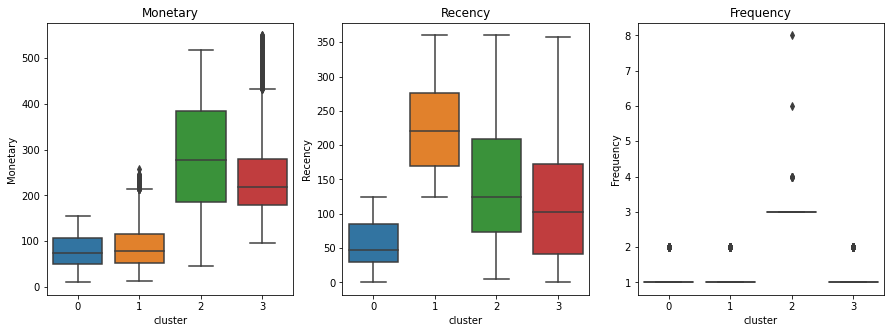

In [29]:
# Create a 1x3 grid of subplots
fig, ax = plt.subplots(ncols=3, figsize=(15, 5))

# Plot each boxplot on a separate subplot
sns.boxplot(x='cluster', y='Monetary', data=rfm_data, ax=ax[0])
sns.boxplot(x='cluster', y='Recency', data=rfm_data, ax=ax[1])
sns.boxplot(x='cluster', y='Frequency', data=rfm_data, ax=ax[2])

# Add titles to the subplots
ax[0].set_title('Monetary')
ax[1].set_title('Recency')
ax[2].set_title('Frequency')

# Display the figure
plt.show()


### Segment

In [30]:
# create dictionary to map cluster values to segment names
cluster_to_segment = {
    0: "Bronze",
    1: "White",
    2: "Gold",
    3: "Slive"
}

# create new 'segment' column by mapping cluster values to segment names
rfm_data['segment'] = rfm_data['cluster'].map(cluster_to_segment)
rfm_data

,Recency,Frequency,Monetary,F,R,M,RFM_Score,cluster,segment
customer_unique_id,,,,,,,,,
0000f46a3911fa3c0805444483337064,296,1,86.22,1,1,2,4,1,White
0000f6ccb0745a6a4b88665a16c9f078,80,1,43.62,1,3,1,5,0,Bronze
0004aac84e0df4da2b147fca70cf8255,47,1,196.89,1,4,4,9,3,Slive
0005e1862207bf6ccc02e4228effd9a0,301,1,150.12,1,1,3,5,1,White
0006fdc98a402fceb4eb0ee528f6a8d4,166,1,29.00,1,2,1,4,1,White
...,...,...,...,...,...,...,...,...,...
fffa431dd3fcdefea4b1777d114144f2,62,1,81.20,1,3,2,6,0,Bronze
fffb09418989a0dbff854a28163e47c6,14,1,73.16,1,4,2,7,0,Bronze
fffea47cd6d3cc0a88bd621562a9d061,21,1,84.58,1,4,2,7,0,Bronze


#### Insight

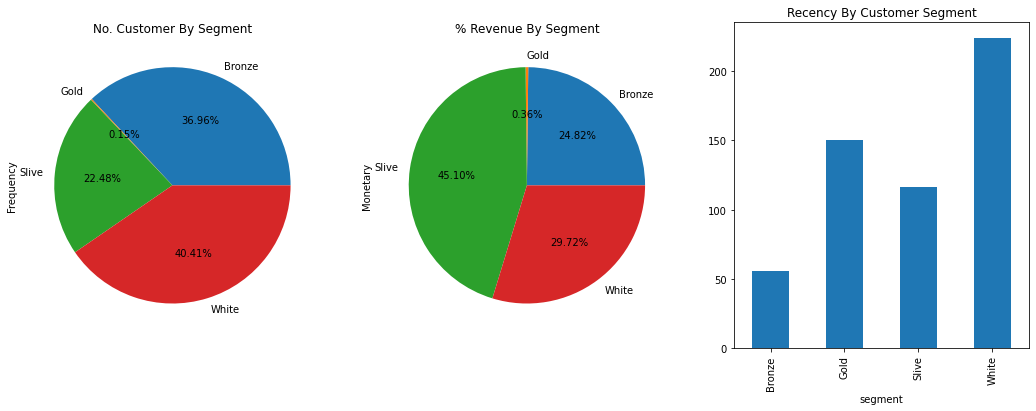

In [31]:

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# First chart
rfm_data.groupby('segment').Frequency.count().plot.pie(autopct='%2.2f%%', ax=axs[0])
axs[0].set_title('No. Customer By Segment')

# Second chart
rfm_data.groupby('segment').Monetary.sum().plot.pie(autopct='%2.2f%%', ax=axs[1])
axs[1].set_title('% Revenue By Segment')

# Third chart
rfm_data.groupby('segment').Recency.mean().plot.bar(ax=axs[2])
axs[2].set_title('Recency By Customer Segment')

plt.show()


# 3. Supervised learning: Customer Lifetime Value predict 

### Customer LifeTime Value (CLTV or CLV)

* CLTV = (Customer Value / Churn Rate) x Profit Margin

* Customer Value = Average Order Value * Purchase Frequency

* Average Order Value = Total Price / Total Transaction

* Purchase Frequency = Total Transaction / Total Number of Customers

* Churn Rate = 1 - Repeat Rate

* Repeat Rate = Number of customers making multiple purchases / All customers

* Profit Margin = Total Price * 0.10

In [33]:
clv_df = deepcopy(df)
print(clv_df.shape)
clv_df.head()

(44943, 12)


,order_id,customer_unique_id,order_purchase_timestamp,product_id,order_item_id,product_category,price,freight_value,total_amount,review_score,customer_city,customer_state
0,00e7ee1b050b8499577073aeb2a297a1,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:05:35,a9516a079e37a9c9c36b9b78b10169e8,1,office_furniture,124.99,21.88,146.87,4,franca,SP
1,c1d2b34febe9cd269e378117d6681172,9eae34bbd3a474ec5d07949ca7de67c0,2017-11-09 00:50:13,a9516a079e37a9c9c36b9b78b10169e8,1,office_furniture,112.99,24.90,137.89,1,santarem,PA
2,c1d2b34febe9cd269e378117d6681172,9eae34bbd3a474ec5d07949ca7de67c0,2017-11-09 00:50:13,a9516a079e37a9c9c36b9b78b10169e8,2,office_furniture,112.99,24.90,137.89,1,santarem,PA
3,b1a5d5365d330d10485e0203d54ab9e8,3c799d181c34d51f6d44bbbc563024db,2017-05-07 20:11:26,a9516a079e37a9c9c36b9b78b10169e8,1,office_furniture,124.99,15.62,140.61,3,nova santa rita,RS
4,574fe1739f65af76badd0999db300b4f,567ab47ca4deb92d46dbf54dce07d0a7,2017-03-23 15:10:17,a9516a079e37a9c9c36b9b78b10169e8,1,office_furniture,126.99,15.06,142.05,4,angelina,SC


In [34]:
clv_c = clv_df.groupby('customer_unique_id').agg({'order_id': lambda x: x.nunique(),
                                       'order_item_id': lambda x: x.count(),
                                       'total_amount': lambda x: x.sum()})

clv_c.columns = ['total_transaction', 'total_unit', 'total_price']

clv_c.head()

,total_transaction,total_unit,total_price
customer_unique_id,,,
0000f46a3911fa3c0805444483337064,1,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,1,1,43.62
0004aac84e0df4da2b147fca70cf8255,1,1,196.89
0005e1862207bf6ccc02e4228effd9a0,1,1,150.12
0006fdc98a402fceb4eb0ee528f6a8d4,1,1,29.00


In [35]:
clv_c['avg_order_value'] = clv_c['total_price'] / clv_c['total_transaction']
clv_c["purchase_frequency"] = clv_c['total_transaction'] / clv_c.shape[0]

In [36]:
repeat_rate = clv_c[clv_c.total_transaction > 1].shape[0] / clv_c.shape[0]
churn_rate = 1 - repeat_rate

In [37]:
clv_c['profit_margin'] = clv_c['total_price'] * 0.10
clv_c.head()

,total_transaction,total_unit,total_price,avg_order_value,purchase_frequency,profit_margin
customer_unique_id,,,,,,
0000f46a3911fa3c0805444483337064,1,1,86.22,86.22,0.000026,8.622
0000f6ccb0745a6a4b88665a16c9f078,1,1,43.62,43.62,0.000026,4.362
0004aac84e0df4da2b147fca70cf8255,1,1,196.89,196.89,0.000026,19.689
0005e1862207bf6ccc02e4228effd9a0,1,1,150.12,150.12,0.000026,15.012
0006fdc98a402fceb4eb0ee528f6a8d4,1,1,29.00,29.00,0.000026,2.900


### Customer Value


```
Customer Value = AOV *Purchase Freaquency 
               = Revenue/Total Order * Total Order/Total Customer 
               = Revenue/Total Customer = ARPU
```

In [38]:
clv_c['customer_value'] = clv_c['avg_order_value'] * clv_c["purchase_frequency"]

```
lifespan = 1/churn_rate 
Ex: churn_rate monthly = 0.01
lifespan=1/1% = 100 month = 8 years
```

### Customer Lifetime Value


```
Customer Lifetime Value = (Customer Value/ Churn Rate) * Profit
                        = ARPU * Lifespan * Profit
```

In [39]:
# Calculate customer lifetime vaule 
clv_c['cltv'] = (clv_c['customer_value'] / churn_rate) * clv_c['profit_margin']

In [40]:
print(clv_c.shape)
clv_c.head()

(38079, 8)


,total_transaction,total_unit,total_price,avg_order_value,purchase_frequency,profit_margin,customer_value,cltv
customer_unique_id,,,,,,,,
0000f46a3911fa3c0805444483337064,1,1,86.22,86.22,0.000026,8.622,0.002264,0.020074
0000f6ccb0745a6a4b88665a16c9f078,1,1,43.62,43.62,0.000026,4.362,0.001146,0.005138
0004aac84e0df4da2b147fca70cf8255,1,1,196.89,196.89,0.000026,19.689,0.005171,0.104679
0005e1862207bf6ccc02e4228effd9a0,1,1,150.12,150.12,0.000026,15.012,0.003942,0.060854
0006fdc98a402fceb4eb0ee528f6a8d4,1,1,29.00,29.00,0.000026,2.900,0.000762,0.002271


### Split data 

In [41]:
X = clv_c.drop(['cltv'],axis = 1)
y = clv_c['cltv']

In [42]:
## Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=8)

## Linear Regression
find the best-fit line that can describe the relationship between the independent variables and the dependent variable

In [43]:
# Define the models
linear_model = LinearRegression()

# Fit the models and make predictions
linear_model.fit(X_train, y_train)
linear_y_pred = linear_model.predict(X_test)

# Calculate the performance metrics
linear_mse = mean_squared_error(y_test, linear_y_pred)
linear_r2 = r2_score(y_test, linear_y_pred)


## Support vector regression SVR
find a function that best fits the training data

In [44]:
# Define the models
support_vector_model = SVR(kernel='rbf')

# Fit the models and make predictions
support_vector_model.fit(X_train, y_train)
svr_y_pred = support_vector_model.predict(X_test)

# Calculate the performance metrics
svr_mse = mean_squared_error(y_test, svr_y_pred)
svr_r2 = r2_score(y_test, svr_y_pred)


## K-Neighbors Regression 
find the K-nearest neighbors to a data point in the training set and using their average value as the predicted value for the new data point.


In [45]:
# Define the models
knn_model = KNeighborsRegressor(n_neighbors=5)  ## n_neighbors can be adjusted to improve the model's performance

# Fit the models and make predictions
knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)

# Calculate the performance metrics
knn_mse = mean_squared_error(y_test, knn_y_pred)
knn_r2 = r2_score(y_test, knn_y_pred)


## Compare the result of 3 model machine learning

In [46]:
# Create a dataframe with the results
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Support Vector Regression', 'K-Neighbors Regression'],
    'Mean Squared Error': [linear_mse, svr_mse, knn_mse],
    'R-squared Score': [linear_r2, svr_r2, knn_r2]
})

results

,Model,Mean Squared Error,R-squared Score
0,Linear Regression,0.005655,0.687923
1,Support Vector Regression,0.003412,0.811671
2,K-Neighbors Regression,0.000081,0.995520


In [47]:
##K-Neighbors Regression is the best model because lowest Mean Squared Error and higest R-squared Score

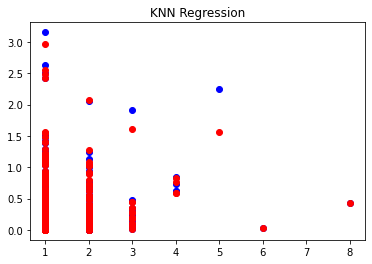

In [48]:
# Plot the KNeighborsRegressor predictions
plt.scatter(X_test.iloc[:, 0], y_test, color='blue')
plt.scatter(X_test.iloc[:, 0], knn_y_pred, color='red')
plt.title('KNN Regression')
plt.show()